# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

In [56]:
import pandas as pd
import cleaning as cl
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
df = cl.drop_useless_columns(df)

In [25]:
df = cl.clean_data(df)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
9131,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [26]:
df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
vehicle_type                        1
dtype: int64

In [65]:
df['number_of_policies'].value_counts()

number_of_policies
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: count, dtype: int64

In [29]:
df_low_total_claim_amount = df[(df['total_claim_amount'] <= 1000.0) & (df['response'] == 'Yes')]
df_low_total_claim_amount

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,79487,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,41479,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,63774,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,FB17016,Oregon,5470.060561,Yes,Extended,Bachelor,2/17/11,Employed,F,54507,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,702.990032,SUV,Medsize,A
9082,ME22430,Nevada,2453.570794,Yes,Basic,Bachelor,2/9/11,Medical Leave,M,29735,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,331.200000,Four-Door Car,Medsize,A
9086,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,57693,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
9117,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,52583,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

In [46]:
cols_to_use = [ col for col in df.columns if col == 'customer_lifetime_value' or col == 'monthly_premium' ]
pivot_monthly_premium_df = df[df['response'] == 'Yes'].pivot_table(index='policy_type', columns='gender', values=cols_to_use, aggfunc='mean').round(2)
pivot_monthly_premium_df['customer_type'] = 'normal risk'
pivot_monthly_premium_df

customer_lifetime_value          customer_type
gender                               F        M              
policy_type                                                  
Corporate Auto                 7679.97  7650.77   normal risk
Personal Auto                  8356.66  7328.48   normal risk
Special Auto                   8212.33  8608.17   normal risk

In [47]:
cols_to_use = [ col for col in df_low_total_claim_amount.columns if col == 'customer_lifetime_value' or col == 'monthly_premium' ]
pivot_monthly_premium_low_risk_df = df_low_total_claim_amount.pivot_table(index='policy_type', columns='gender', values=cols_to_use, aggfunc='mean').round(2)
pivot_monthly_premium_low_risk_df['customer_type'] = 'low risk'
pivot_monthly_premium_low_risk_df

customer_lifetime_value          customer_type
gender                               F        M              
policy_type                                                  
Corporate Auto                 7356.56  7613.39      low risk
Personal Auto                  7944.49  7359.08      low risk
Special Auto                   8119.10  8742.33      low risk

In [48]:
combined_df = pd.concat([pivot_monthly_premium_low_risk_df, pivot_monthly_premium_df]).reset_index()
combined_df

policy_type customer_lifetime_value          customer_type
gender                                       F        M              
0       Corporate Auto                 7356.56  7613.39      low risk
1        Personal Auto                 7944.49  7359.08      low risk
2         Special Auto                 8119.10  8742.33      low risk
3       Corporate Auto                 7679.97  7650.77   normal risk
4        Personal Auto                 8356.66  7328.48   normal risk
5         Special Auto                 8212.33  8608.17   normal risk

In [51]:
combined_df.columns = ['policy_type', 'F', 'M', 'customer_type']
combined_df

,policy_type,F,M,customer_type
0,Corporate Auto,7356.56,7613.39,low risk
1,Personal Auto,7944.49,7359.08,low risk
2,Special Auto,8119.10,8742.33,low risk
3,Corporate Auto,7679.97,7650.77,normal risk
4,Personal Auto,8356.66,7328.48,normal risk
5,Special Auto,8212.33,8608.17,normal risk


In [53]:
combined_long_format_df = pd.melt(combined_df,
                                    id_vars=['policy_type', 'customer_type'],
                                    value_vars=['F', 'M'],
                                    var_name='gender',
                                    value_name='customer_lifetime_value')
combined_long_format_df

,policy_type,customer_type,gender,customer_lifetime_value
0,Corporate Auto,low risk,F,7356.56
1,Personal Auto,low risk,F,7944.49
2,Special Auto,low risk,F,8119.10
3,Corporate Auto,normal risk,F,7679.97
4,Personal Auto,normal risk,F,8356.66
5,Special Auto,normal risk,F,8212.33
6,Corporate Auto,low risk,M,7613.39
7,Personal Auto,low risk,M,7359.08
8,Special Auto,low risk,M,8742.33
9,Corporate Auto,normal risk,M,7650.77


<Figure size 1000x500 with 0 Axes>

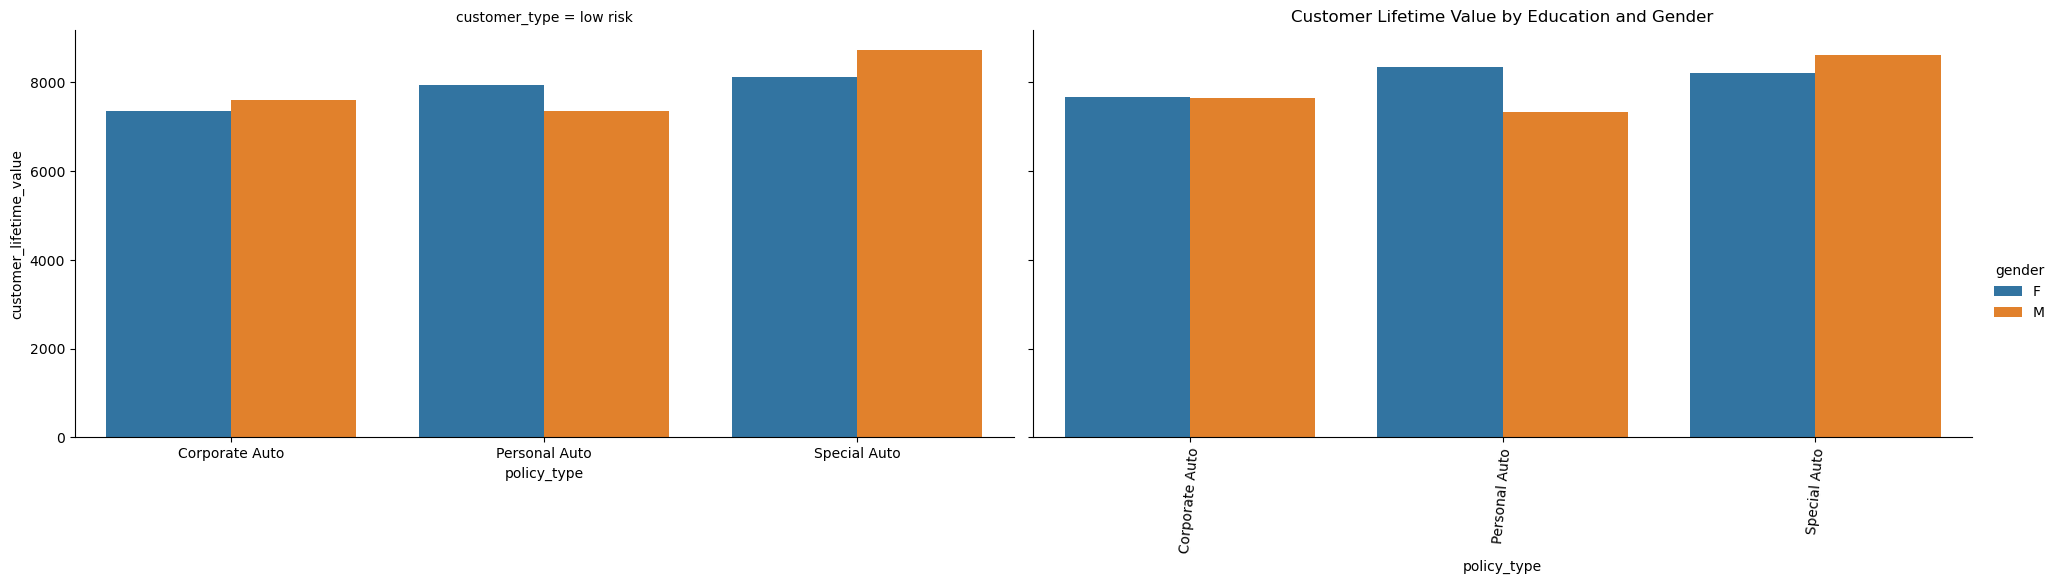

In [62]:
plt.figure(figsize=(10,5))
sns.catplot(
    data=combined_long_format_df,
    x='policy_type',                         # Categorical variable for X-axis
    y="customer_lifetime_value",           # Numeric variable for Y-axis
    hue="gender",                          # Optional: for group comparison (side-by-side groups)
    col='customer_type',
    kind="bar",                             # Type of plot: "bar", "box", "violin", etc.
    aspect=2
)
plt.title("Customer Lifetime Value by Education and Gender")
plt.xticks(rotation=85)
plt.ylabel("Customer Lifetime Value")
plt.show()

## insights

To increase the revenue and lower the risk in the same time, the company should focus on product for Special Auto and corporate auto low risk female customers segment

---

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [83]:
df['state'].value_counts()
state_counts = df.groupby('state').size().reset_index(name='num_customer')
state_counts = state_counts[state_counts['num_customer'] >= 500]
state_counts

,state,num_customer
0,Arizona,1655
1,California,3035
2,Nevada,863
3,Oregon,2517
4,Washington,774


/var/folders/9x/t81_t1w14_s8w2jy_nx_xn4m0000gn/T/ipykernel_6747/357250665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_counts, x='state', y='num_customer',palette='Set2')


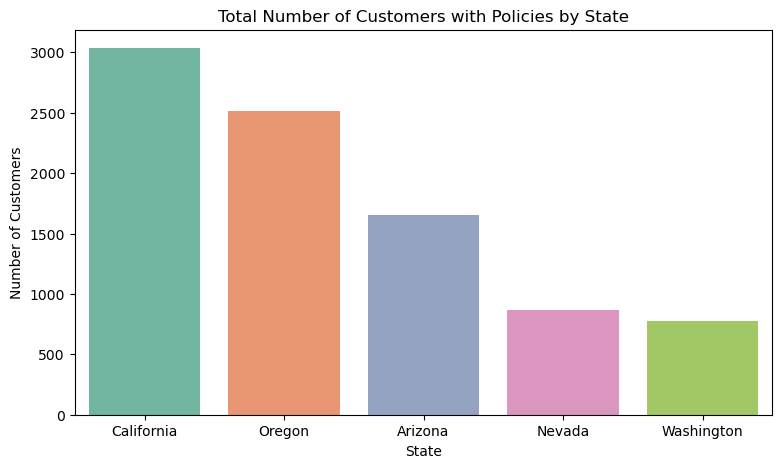

In [109]:
plt.figure(figsize=(9, 5)) 
state_counts = state_counts.sort_values(by='num_customer', ascending=False)
sns.barplot(data=state_counts, x='state', y='num_customer',palette='Set2')
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Total Number of Customers with Policies by State")
plt.show()

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [117]:
pivot_education_df = df.pivot_table(index='education', columns='gender', values='customer_lifetime_value', aggfunc=['max', 'min', 'median']).round(2)
pivot_education_df

max                min            median         
gender                       F         M        F        M        F        M
education                                                                   
Bachelor              73225.96  67907.27  1904.00  1898.01  5678.05  5555.83
College               61850.19  61134.68  1898.68  1918.12  5621.79  5989.77
Doctor                44856.11  32677.34  2395.57  2267.60  5332.46  5620.59
High School or Below  55277.45  83325.38  2144.92  1940.98  6044.02  6176.70
Master                51016.07  50568.26  2417.78  2272.31  5801.13  5617.96

## Key Insights

- **Highest Median CLV:**  
  - Customers with a "High School or Below" education level have the highest median CLV for both females (6,044.02) and males (6,176.70).
- **Education and Median CLV:**  
  - Contrary to what you might expect, higher education (Bachelor, Master, Doctor) does not guarantee a higher median CLV. Both median and max values for "High School or Below" are competitive or even higher than those with advanced degrees.
- **Gender Comparison:**  
  - The differences between female and male median CLV values are generally small across most education levels, with one gender only slightly ahead depending on the group.
  - For the "Doctor" degree, males have a slightly higher median CLV (6,020.59 vs. 5,332.46).
  - For "Master" and "Bachelor," females have a slightly higher median CLV.
- **Max and Min Values:**  
  - There is substantial variability in the maximum CLV within each education group; for example, males with only a "High School or Below" education have a very high max value (83,325.38).
  - The minimum CLV values are fairly consistent across genders and education levels, generally hovering around 1,900–2,400.

## Conclusions

1. **Education Level Alone Does Not Drive CLV:**  
   Customers with "High School or Below" education can be just as, if not more, valuable than those with college or advanced degrees (as seen from the median values).

2. **Gender-Based Differences Are Minor:**  
   The differences between males and females in terms of CLV are minor, suggesting that marketing or retention strategies should not lean heavily on gender for targeting within educational segments.

3. **Potential High-Value Customers in All Segments:**  
   Both the max and median CLV values show that high-value customers exist in all education and gender groups. Segmentation for high-value targeting might consider other factors beyond just education and gender.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# your code goes here